# INCEPTIONV3

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing import image

# Verisetinin dizini
dataset_dir = '/kaggle/input/garbage-dataset-equalizated-zip/garbage-dataset-equalizated'

# Veri sınıflarının bulunduğu klasörler
class_names = os.listdir(dataset_dir)
num_classes = len(class_names)

# Veriyi yükleme
X = []
y = []
class_counts = {}  # Her sınıfta kaç görsel olduğunu tutmak için

for idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_dir, class_name)
    images = [os.path.join(class_folder, img) for img in os.listdir(class_folder) if img.endswith('.jpg') or img.endswith('.png')]
    class_counts[class_name] = len(images)  # Sınıf başına görsel sayısı
    for image_path in images:
        X.append(image_path)
        y.append(idx)

X = np.array(X)
y = np.array(y)

# Sınıf bilgilerini ekrana yazdır
print(f"Toplam {num_classes} sınıf bulundu.")
print("Sınıf isimleri ve her sınıftaki görsel sayısı:")
for class_name, count in class_counts.items():
    print(f"- {class_name}: {count} görsel")


Toplam 10 sınıf bulundu.
Sınıf isimleri ve her sınıftaki görsel sayısı:
- metal: 920 görsel
- glass: 920 görsel
- biological: 920 görsel
- paper: 920 görsel
- battery: 920 görsel
- trash: 920 görsel
- cardboard: 920 görsel
- shoes: 920 görsel
- clothes: 920 görsel
- plastic: 920 görsel


In [7]:
def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img = image.img_to_array(img)
        img = img / 255.0  # Normalizasyon
        images.append(img)
    return np.array(images)


Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4559 - loss: 1.6657
Epoch 1: val_accuracy improved from -inf to 0.88043, saving model to inceptionV3_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.4567 - loss: 1.6633 - val_accuracy: 0.8804 - val_loss: 0.3970 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8506 - loss: 0.5222
Epoch 2: val_accuracy improved from 0.88043 to 0.89022, saving model to inceptionV3_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8506 - loss: 0.5223 - val_accuracy: 0.8902 - val_loss: 0.4409 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8945 - loss: 0.3934
Epoch 3: val_accuracy improved from 0.89022 to 0.89348, saving model to inceptionV3_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8945 - loss: 0.3935 - val_accuracy: 0.8935 - val_loss: 0.4298 - learning_rate: 0.001

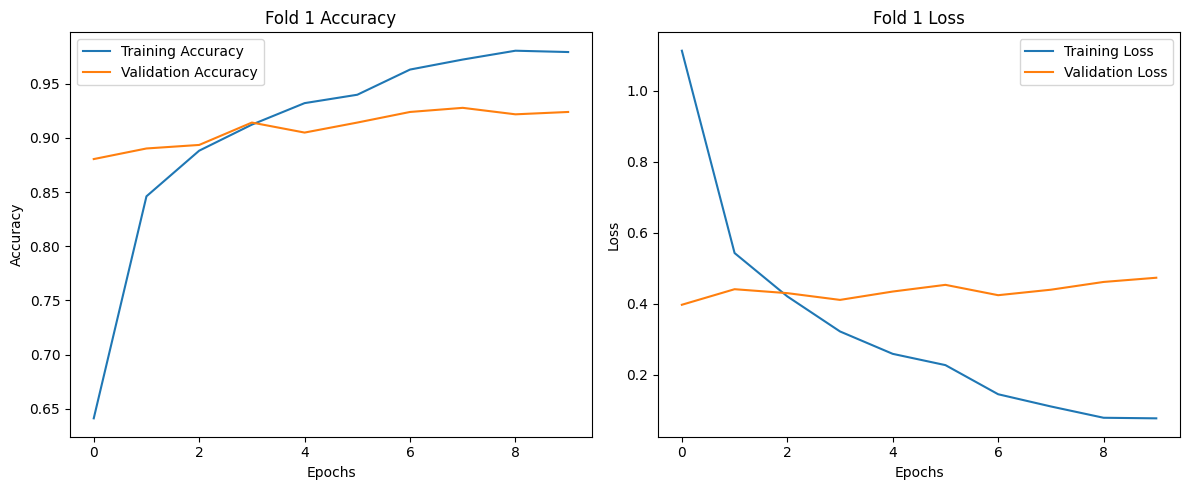

58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step

Classification Report (Fold 1):
              precision    recall  f1-score   support

       metal     0.8550    0.9293    0.8906       184
       glass     0.9480    0.8913    0.9188       184
  biological     0.9672    0.9620    0.9646       184
       paper     0.9071    0.9022    0.9046       184
     battery     0.9781    0.9728    0.9755       184
       trash     0.8933    0.8641    0.8785       184
   cardboard     0.9048    0.9293    0.9169       184
       shoes     0.9731    0.9837    0.9784       184
     clothes     0.9781    0.9728    0.9755       184
     plastic     0.8791    0.8696    0.8743       184

    accuracy                         0.9277      1840
   macro avg     0.9284    0.9277    0.9278      1840
weighted avg     0.9284    0.9277    0.9278      1840



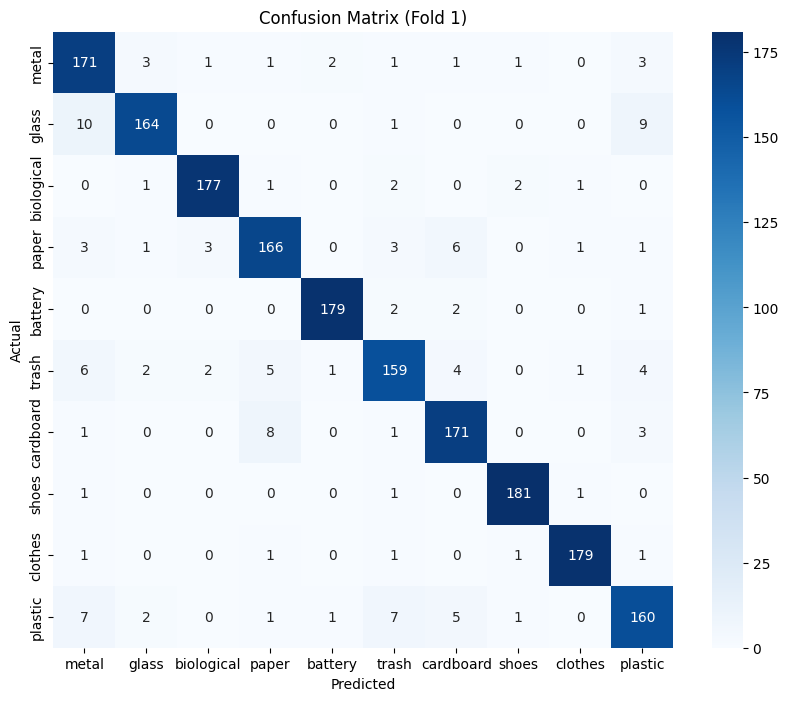


Training fold 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4711 - loss: 1.6339
Epoch 1: val_accuracy improved from -inf to 0.89076, saving model to inceptionV3_best_weights_2.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.4719 - loss: 1.6316 - val_accuracy: 0.8908 - val_loss: 0.3777 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8259 - loss: 0.5879
Epoch 2: val_accuracy improved from 0.89076 to 0.89837, saving model to inceptionV3_best_weights_2.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8260 - loss: 0.5877 - val_accuracy: 0.8984 - val_loss: 0.3678 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8880 - loss: 0.4280
Epoch 3: val_accuracy improved from 0.89837 to 0.92337, saving model to inceptionV3_best_weights_2.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8880 - loss: 0.4280 - val_accuracy: 0.9234 - val_loss: 0.3109 - learning_rate: 0.001

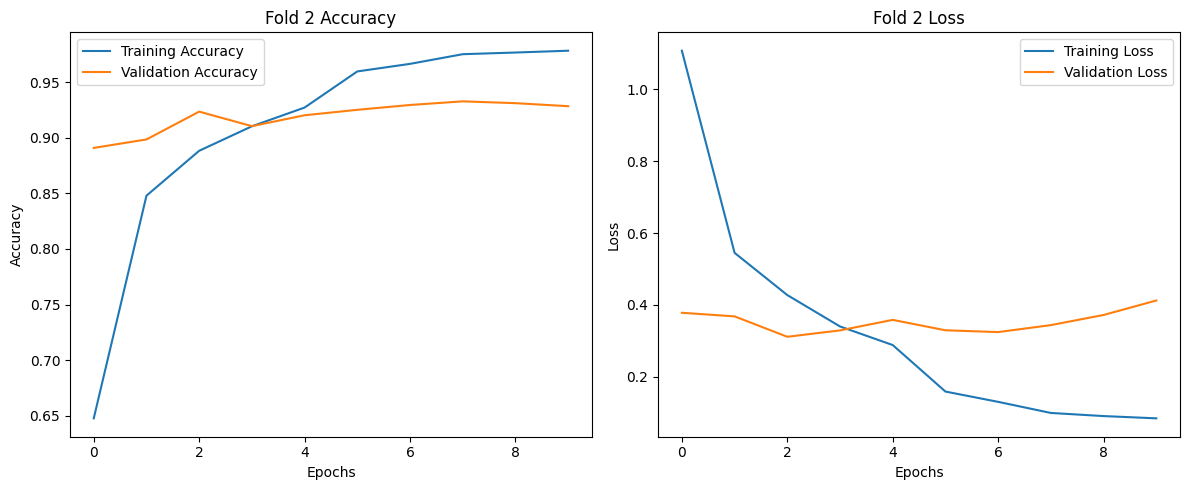

58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step

Classification Report (Fold 2):
              precision    recall  f1-score   support

       metal     0.8528    0.9130    0.8819       184
       glass     0.9200    0.8750    0.8969       184
  biological     0.9730    0.9783    0.9756       184
       paper     0.9227    0.9076    0.9151       184
     battery     0.9577    0.9837    0.9705       184
       trash     0.8848    0.9185    0.9013       184
   cardboard     0.9505    0.9402    0.9454       184
       shoes     0.9890    0.9783    0.9836       184
     clothes     0.9837    0.9837    0.9837       184
     plastic     0.8908    0.8424    0.8659       184

    accuracy                         0.9321      1840
   macro avg     0.9325    0.9321    0.9320      1840
weighted avg     0.9325    0.9321    0.9320      1840



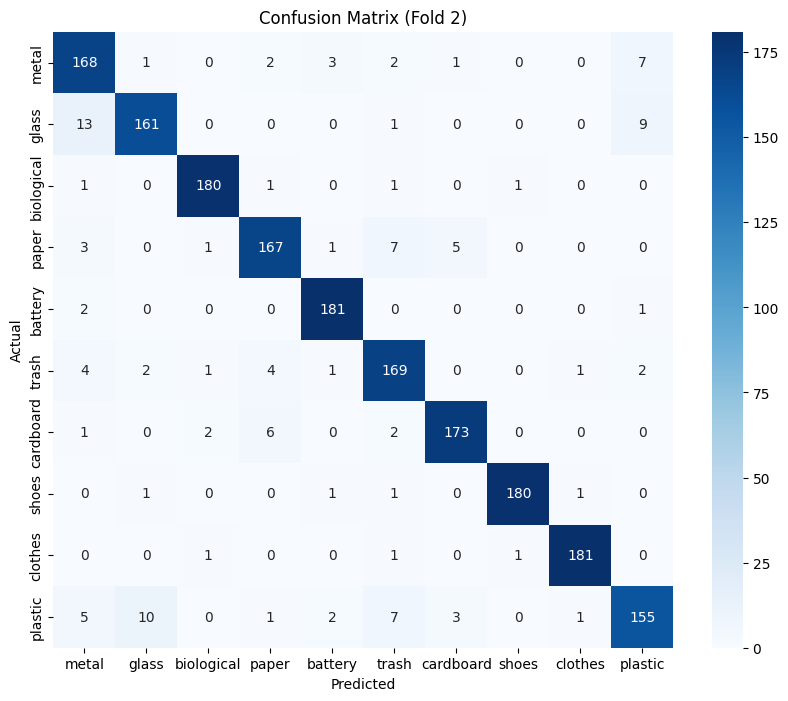


Training fold 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4372 - loss: 1.6723
Epoch 1: val_accuracy improved from -inf to 0.89457, saving model to inceptionV3_best_weights_3.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.4381 - loss: 1.6699 - val_accuracy: 0.8946 - val_loss: 0.3976 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8441 - loss: 0.5231
Epoch 2: val_accuracy improved from 0.89457 to 0.91522, saving model to inceptionV3_best_weights_3.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8440 - loss: 0.5231 - val_accuracy: 0.9152 - val_loss: 0.3074 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8821 - loss: 0.4128
Epoch 3: val_accuracy improved from 0.91522 to 0.91630, saving model to inceptionV3_best_weights_3.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8821 - loss: 0.4128 - val_accuracy: 0.9163 - val_loss: 0.3383 - learning_rate: 0.001

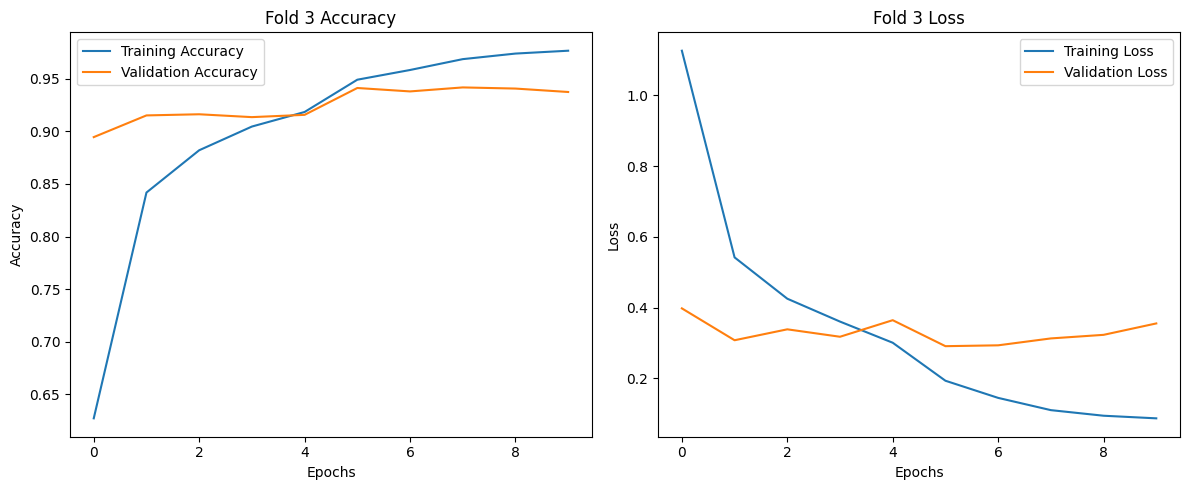

58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step

Classification Report (Fold 3):
              precision    recall  f1-score   support

       metal     0.9105    0.9402    0.9251       184
       glass     0.9578    0.8641    0.9086       184
  biological     0.9839    0.9946    0.9892       184
       paper     0.9389    0.9185    0.9286       184
     battery     0.9333    0.9891    0.9604       184
       trash     0.9010    0.9402    0.9202       184
   cardboard     0.9344    0.9293    0.9319       184
       shoes     0.9583    1.0000    0.9787       184
     clothes     0.9944    0.9620    0.9779       184
     plastic     0.9101    0.8804    0.8950       184

    accuracy                         0.9418      1840
   macro avg     0.9423    0.9418    0.9416      1840
weighted avg     0.9423    0.9418    0.9416      1840



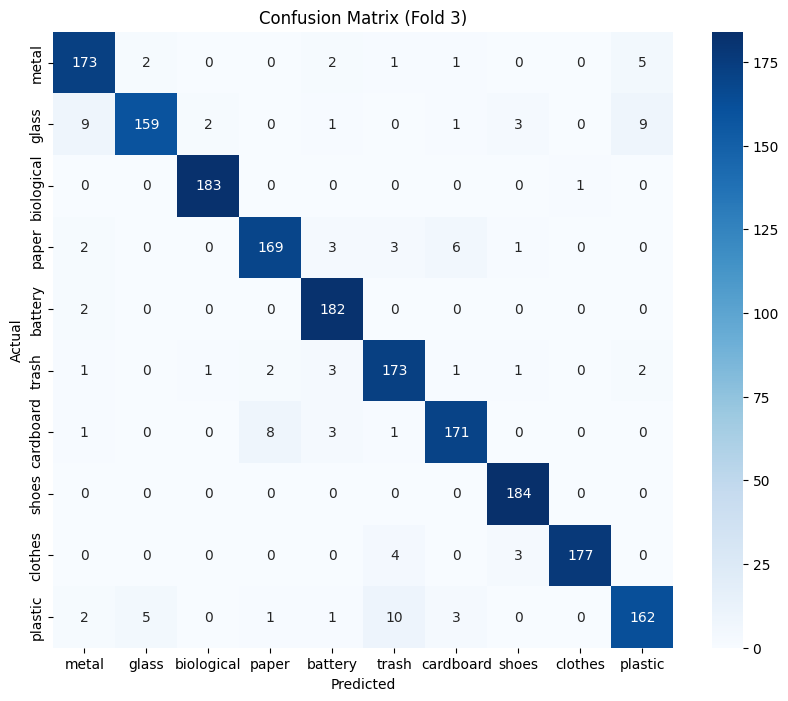


Training fold 4...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4710 - loss: 1.6516
Epoch 1: val_accuracy improved from -inf to 0.85815, saving model to inceptionV3_best_weights_4.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.4717 - loss: 1.6493 - val_accuracy: 0.8582 - val_loss: 0.4820 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8476 - loss: 0.5529
Epoch 2: val_accuracy improved from 0.85815 to 0.88152, saving model to inceptionV3_best_weights_4.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8476 - loss: 0.5528 - val_accuracy: 0.8815 - val_loss: 0.4182 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8963 - loss: 0.3975
Epoch 3: val_accuracy improved from 0.88152 to 0.89239, saving model to inceptionV3_best_weights_4.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8963 - loss: 0.3975 - val_accuracy: 0.8924 - val_loss: 0.3969 - learning_rate: 0.001

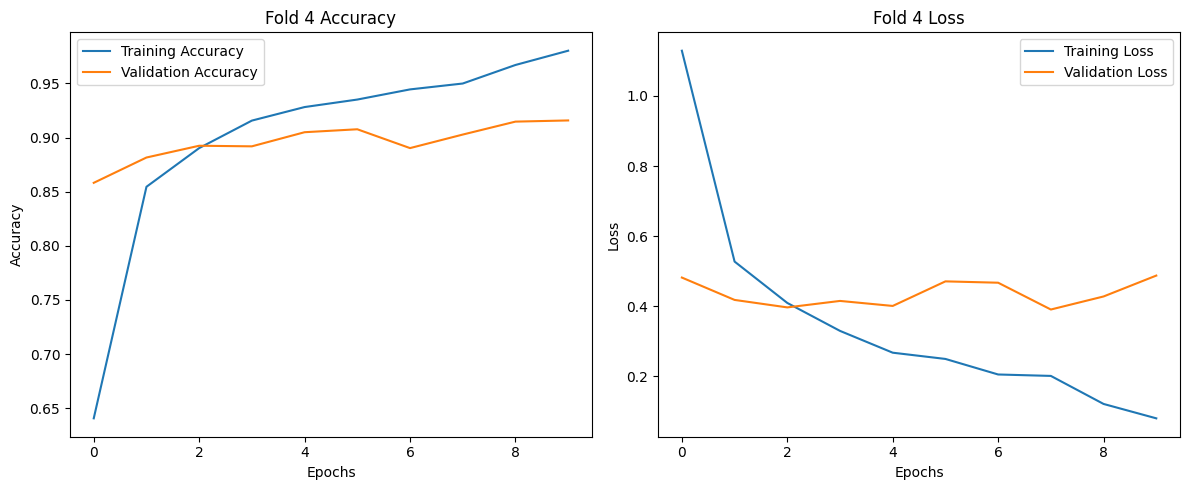

58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step

Classification Report (Fold 4):
              precision    recall  f1-score   support

       metal     0.8771    0.8533    0.8650       184
       glass     0.8681    0.8587    0.8634       184
  biological     0.9468    0.9674    0.9570       184
       paper     0.8492    0.9185    0.8825       184
     battery     0.9271    0.9674    0.9468       184
       trash     0.9249    0.8696    0.8964       184
   cardboard     0.9480    0.8913    0.9188       184
       shoes     0.9615    0.9511    0.9563       184
     clothes     0.9889    0.9674    0.9780       184
     plastic     0.8750    0.9130    0.8936       184

    accuracy                         0.9158      1840
   macro avg     0.9167    0.9158    0.9158      1840
weighted avg     0.9167    0.9158    0.9158      1840



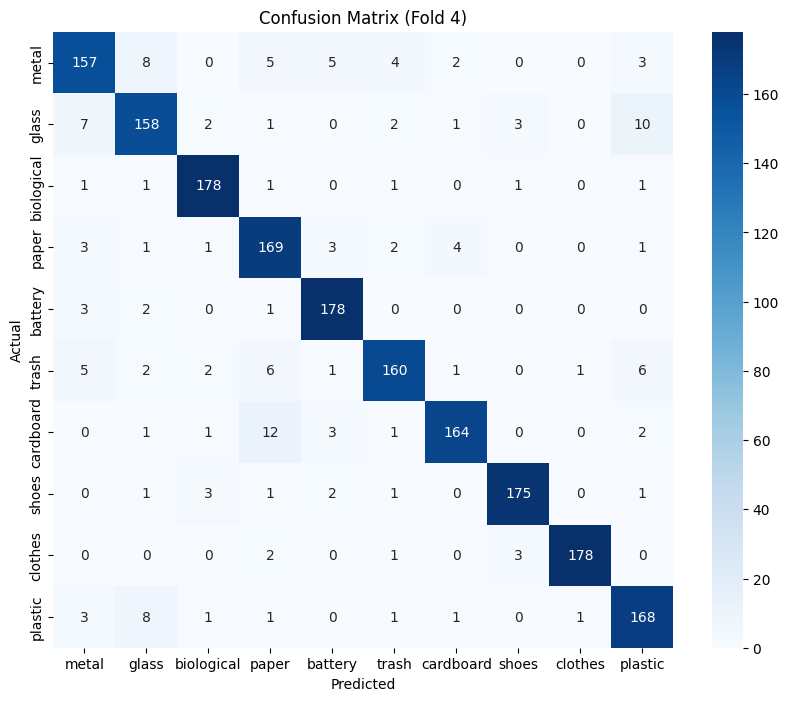


Training fold 5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4752 - loss: 1.5998
Epoch 1: val_accuracy improved from -inf to 0.85870, saving model to inceptionV3_best_weights_5.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.4759 - loss: 1.5976 - val_accuracy: 0.8587 - val_loss: 0.4663 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8292 - loss: 0.5822
Epoch 2: val_accuracy improved from 0.85870 to 0.90652, saving model to inceptionV3_best_weights_5.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8293 - loss: 0.5821 - val_accuracy: 0.9065 - val_loss: 0.3196 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8876 - loss: 0.4280
Epoch 3: val_accuracy improved from 0.90652 to 0.91413, saving model to inceptionV3_best_weights_5.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8876 - loss: 0.4280 - val_accuracy: 0.9141 - val_loss: 0.3214 - learning_rate: 0.001

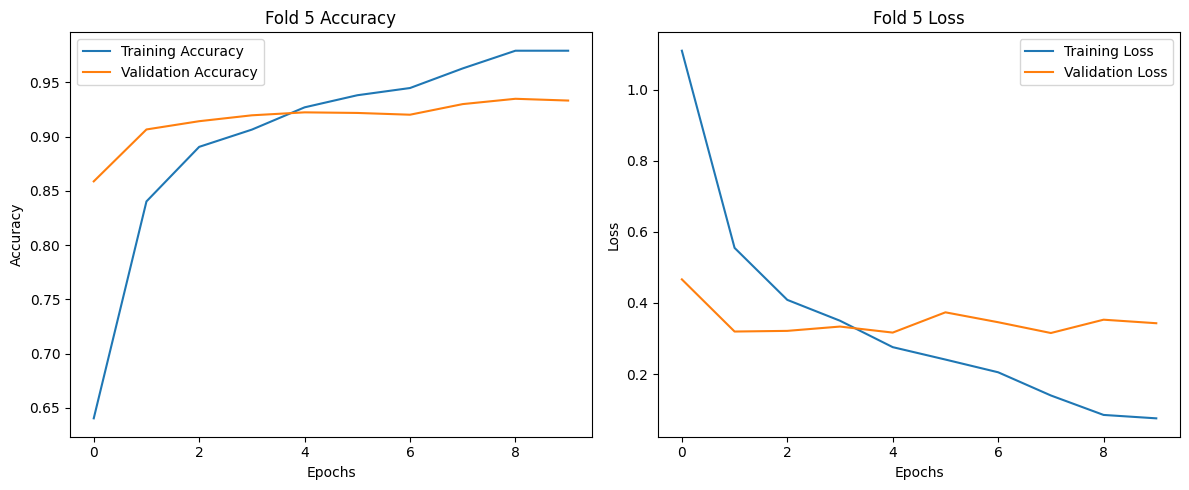

58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step

Classification Report (Fold 5):
              precision    recall  f1-score   support

       metal     0.8848    0.9185    0.9013       184
       glass     0.9314    0.8859    0.9081       184
  biological     0.9524    0.9783    0.9651       184
       paper     0.9494    0.9185    0.9337       184
     battery     0.9560    0.9457    0.9508       184
       trash     0.8500    0.9239    0.8854       184
   cardboard     0.9511    0.9511    0.9511       184
       shoes     0.9779    0.9620    0.9699       184
     clothes     0.9891    0.9837    0.9864       184
     plastic     0.9153    0.8804    0.8975       184

    accuracy                         0.9348      1840
   macro avg     0.9357    0.9348    0.9349      1840
weighted avg     0.9357    0.9348    0.9349      1840



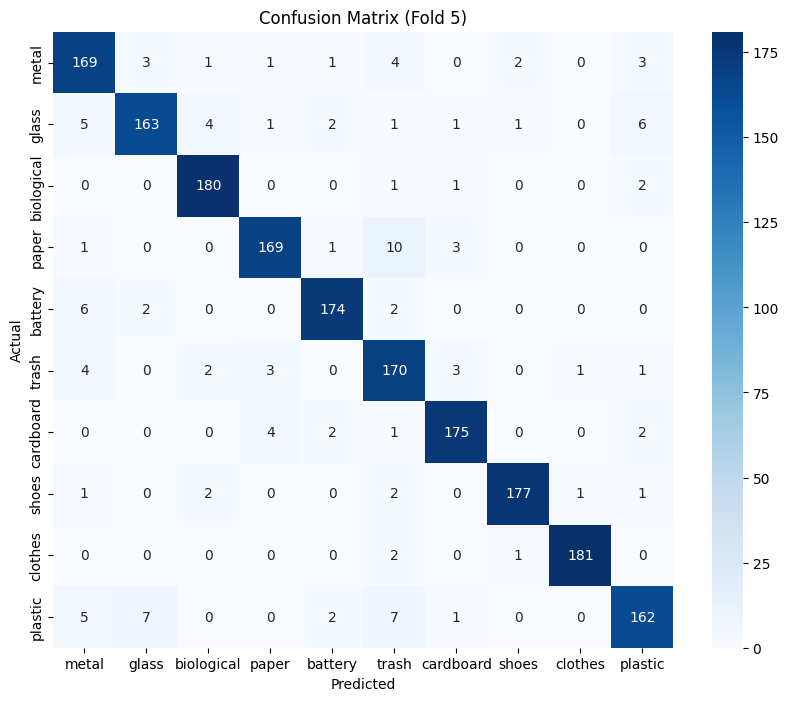


Nihai Confusion Matrix (Toplam):


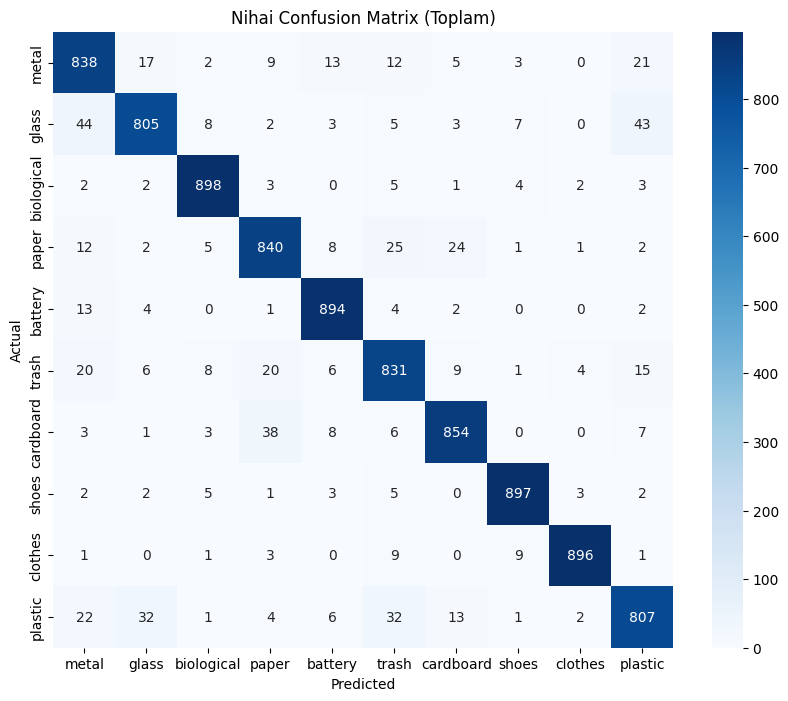

In [8]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
cumulative_cm = np.zeros((num_classes, num_classes), dtype=int)

for train_index, test_index in kf.split(X, y):
    print(f"\nTraining fold {fold_no}...")

    # Eğitim ve test veri setlerini ayırma
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Eğitim ve test veri setlerini yükleme ve ön işleme
    X_train_fold = load_and_preprocess_images(X_train_fold)
    X_test_fold = load_and_preprocess_images(X_test_fold)

    # Callbacks
    checkpoint = ModelCheckpoint(f'inceptionV3_best_weights_{fold_no}.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True, mode='max', verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
    callbacks = [checkpoint, early_stopping, reduce_lr]

    # Modelin oluşturulması
    base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers[:290]:
        layer.trainable = False

    model = models.Sequential([
        layers.InputLayer(input_shape=(224, 224, 3)),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Modeli eğitme
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_test_fold, y_test_fold),
        epochs=10,
        batch_size=16,
        callbacks=callbacks,
        verbose=1
    )

    # Modeli kaydetme
    model_save_path = f"inceptionV3_model_fold_{fold_no}.keras"
    model.save(model_save_path)
    print(f"Model fold {fold_no} kaydedildi: {model_save_path}")

    # Eğitim grafikleri
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Fold {fold_no} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Tahminler ve Confusion Matrix
    y_pred = model.predict(X_test_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test_fold, y_pred_classes)
    cumulative_cm += cm

    print(f"\nClassification Report (Fold {fold_no}):")
    print(classification_report(y_test_fold, y_pred_classes, target_names=class_names, digits=4))

    # Confusion Matrix'i kaydet
    np.save(f'fold_{fold_no}_confusion_matrix.npy', cm)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix (Fold {fold_no})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fold_no += 1


# Nihai Confusion Matrix
print("\nNihai Confusion Matrix (Toplam):")
# Nihai confusion matrix'i fold'ların toplamı olacak
plt.figure(figsize=(10, 8))
sns.heatmap(cumulative_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Nihai Confusion Matrix (Toplam)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In [ ]:
# Nihai Confusion Matrix metin olarak yazdırma
print("\nNihai Confusion Matrix (Metin):")
for i, row in enumerate(cumulative_cm):
    row_text = "\t".join(map(str, row))
    print(f"Class {class_names[i]}: {row_text}")


# RESNET50V2


Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4961 - loss: 1.5188
Epoch 1: val_accuracy improved from -inf to 0.83261, saving model to resnet50V2_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.4969 - loss: 1.5170 - val_accuracy: 0.8326 - val_loss: 0.6491 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8431 - loss: 0.6118
Epoch 2: val_accuracy improved from 0.83261 to 0.87826, saving model to resnet50V2_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8431 - loss: 0.6116 - val_accuracy: 0.8783 - val_loss: 0.5002 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8840 - loss: 0.4260
Epoch 3: val_accuracy improved from 0.87826 to 0.89348, saving model to resnet50V2_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8841 - loss: 0.4259 - val_accuracy: 0.8935 - val_loss: 0.4825 - learning_rate: 0.0010
E

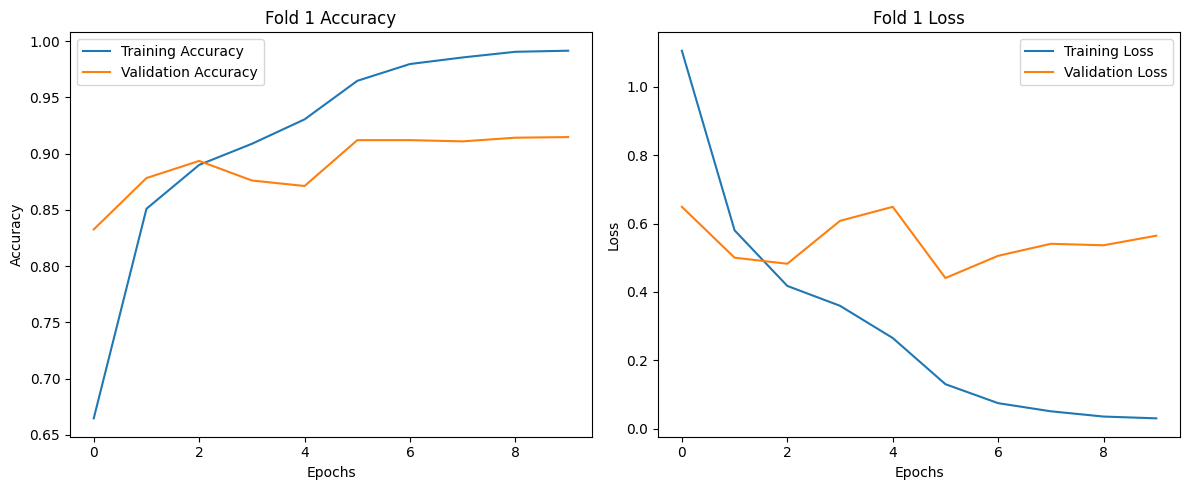

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step

Classification Report (Fold 1):
              precision    recall  f1-score   support

       metal     0.8500    0.9239    0.8854       184
       glass     0.8811    0.8859    0.8835       184
  biological     0.9659    0.9239    0.9444       184
       paper     0.8424    0.9293    0.8837       184
     battery     0.9672    0.9620    0.9646       184
       trash     0.9474    0.7826    0.8571       184
   cardboard     0.9247    0.9348    0.9297       184
       shoes     0.9465    0.9620    0.9542       184
     clothes     0.9476    0.9837    0.9653       184
     plastic     0.8927    0.8587    0.8753       184

    accuracy                         0.9147      1840
   macro avg     0.9165    0.9147    0.9143      1840
weighted avg     0.9165    0.9147    0.9143      1840



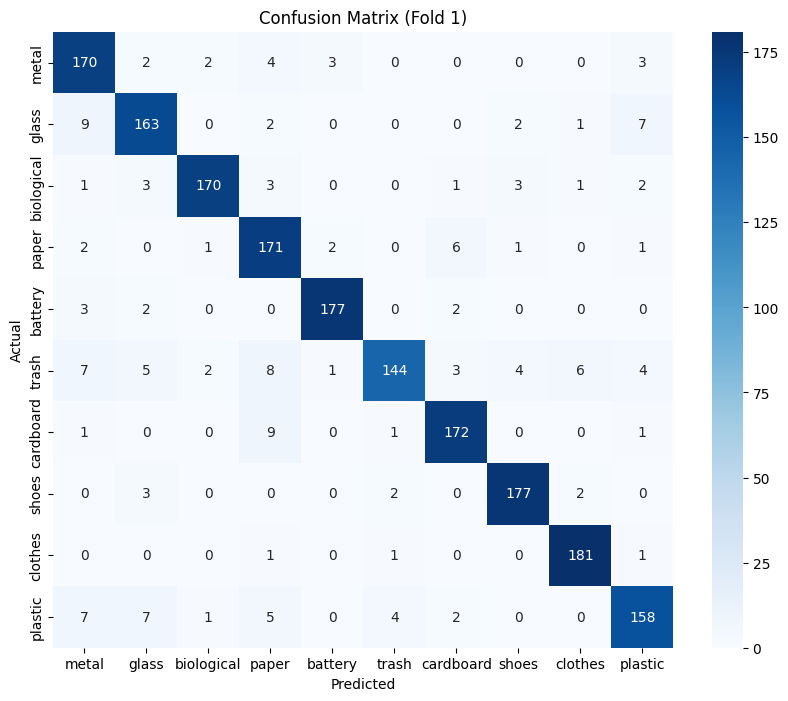


Training fold 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4943 - loss: 1.5219
Epoch 1: val_accuracy improved from -inf to 0.83098, saving model to resnet50V2_best_weights_2.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.4950 - loss: 1.5200 - val_accuracy: 0.8310 - val_loss: 0.7146 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8316 - loss: 0.6180
Epoch 2: val_accuracy improved from 0.83098 to 0.84891, saving model to resnet50V2_best_weights_2.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8317 - loss: 0.6179 - val_accuracy: 0.8489 - val_loss: 0.5881 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8870 - loss: 0.4265
Epoch 3: val_accuracy improved from 0.84891 to 0.87337, saving model to resnet50V2_best_weights_2.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8870 - loss: 0.4266 - val_accuracy: 0.8734 - val_loss: 0.5700 - learning_rate: 0.0010
E

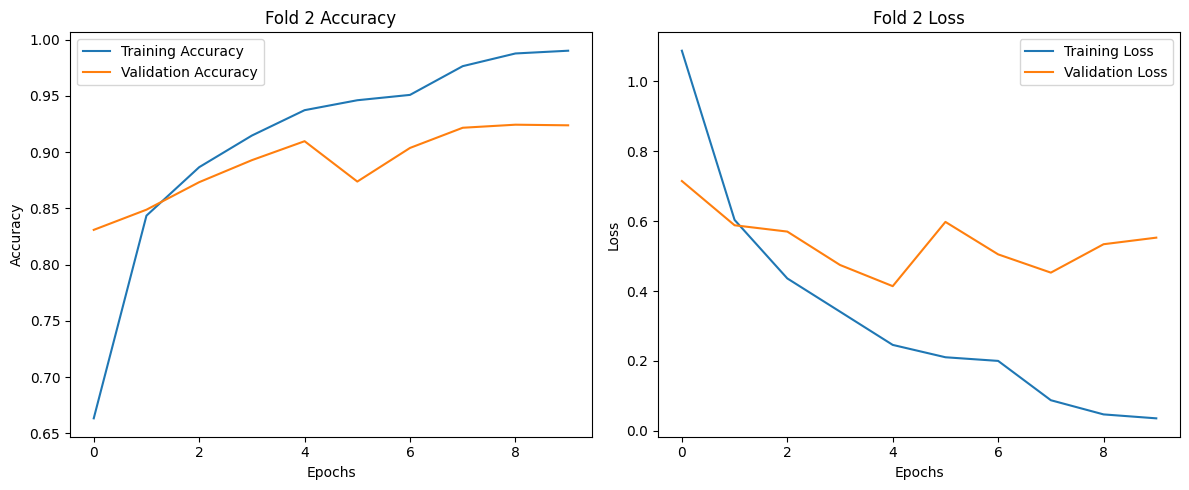

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step

Classification Report (Fold 2):
              precision    recall  f1-score   support

       metal     0.8617    0.8804    0.8710       184
       glass     0.8723    0.8913    0.8817       184
  biological     0.9581    0.9946    0.9760       184
       paper     0.9480    0.8913    0.9188       184
     battery     0.9676    0.9728    0.9702       184
       trash     0.8673    0.9239    0.8947       184
   cardboard     0.9149    0.9348    0.9247       184
       shoes     0.9944    0.9565    0.9751       184
     clothes     0.9838    0.9891    0.9864       184
     plastic     0.8817    0.8098    0.8442       184

    accuracy                         0.9245      1840
   macro avg     0.9250    0.9245    0.9243      1840
weighted avg     0.9250    0.9245    0.9243      1840



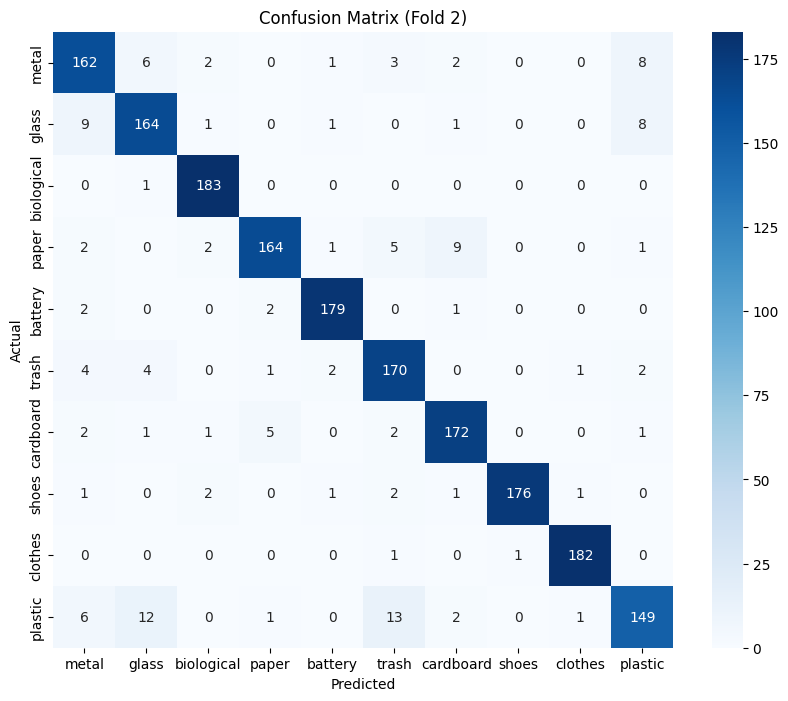


Training fold 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4858 - loss: 1.5635
Epoch 1: val_accuracy improved from -inf to 0.86304, saving model to resnet50V2_best_weights_3.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.4865 - loss: 1.5616 - val_accuracy: 0.8630 - val_loss: 0.5795 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8336 - loss: 0.6168
Epoch 2: val_accuracy improved from 0.86304 to 0.89457, saving model to resnet50V2_best_weights_3.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8336 - loss: 0.6167 - val_accuracy: 0.8946 - val_loss: 0.4370 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8912 - loss: 0.4090
Epoch 3: val_accuracy improved from 0.89457 to 0.90054, saving model to resnet50V2_best_weights_3.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8912 - loss: 0.4091 - val_accuracy: 0.9005 - val_loss: 0.4453 - learning_rate: 0.0010
E

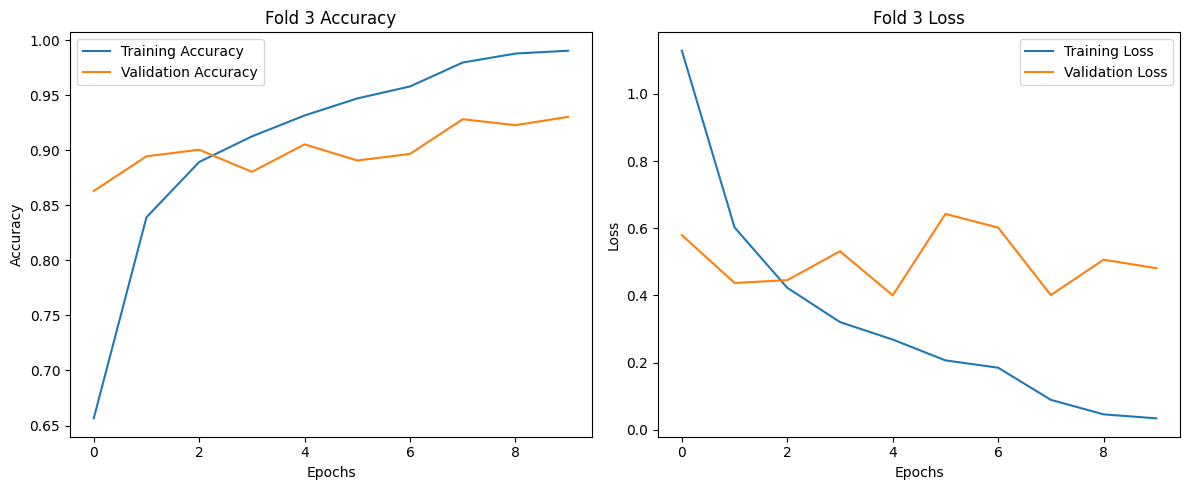

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step

Classification Report (Fold 3):
              precision    recall  f1-score   support

       metal     0.9375    0.8967    0.9167       184
       glass     0.9209    0.8859    0.9030       184
  biological     0.9626    0.9783    0.9704       184
       paper     0.9101    0.8804    0.8950       184
     battery     0.9330    0.9837    0.9577       184
       trash     0.9213    0.8913    0.9061       184
   cardboard     0.9048    0.9293    0.9169       184
       shoes     0.9529    0.9891    0.9707       184
     clothes     0.9837    0.9837    0.9837       184
     plastic     0.8763    0.8859    0.8811       184

    accuracy                         0.9304      1840
   macro avg     0.9303    0.9304    0.9301      1840
weighted avg     0.9303    0.9304    0.9301      1840



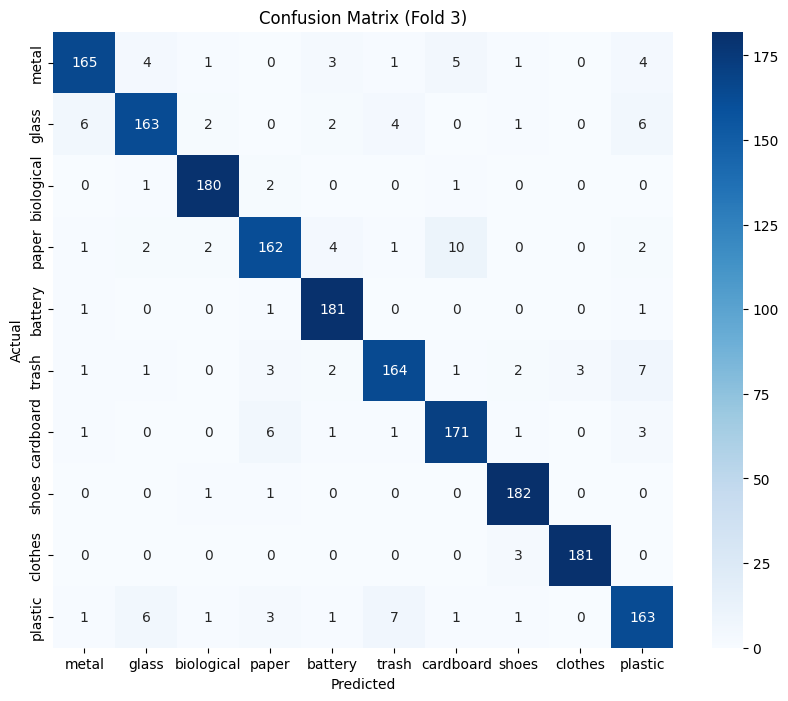


Training fold 4...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4937 - loss: 1.5544
Epoch 1: val_accuracy improved from -inf to 0.85326, saving model to resnet50V2_best_weights_4.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.4944 - loss: 1.5524 - val_accuracy: 0.8533 - val_loss: 0.5740 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8443 - loss: 0.5737
Epoch 2: val_accuracy improved from 0.85326 to 0.87065, saving model to resnet50V2_best_weights_4.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8443 - loss: 0.5736 - val_accuracy: 0.8707 - val_loss: 0.4915 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8966 - loss: 0.3792
Epoch 3: val_accuracy improved from 0.87065 to 0.87228, saving model to resnet50V2_best_weights_4.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8966 - loss: 0.3793 - val_accuracy: 0.8723 - val_loss: 0.4991 - learning_rate: 0.0010
E

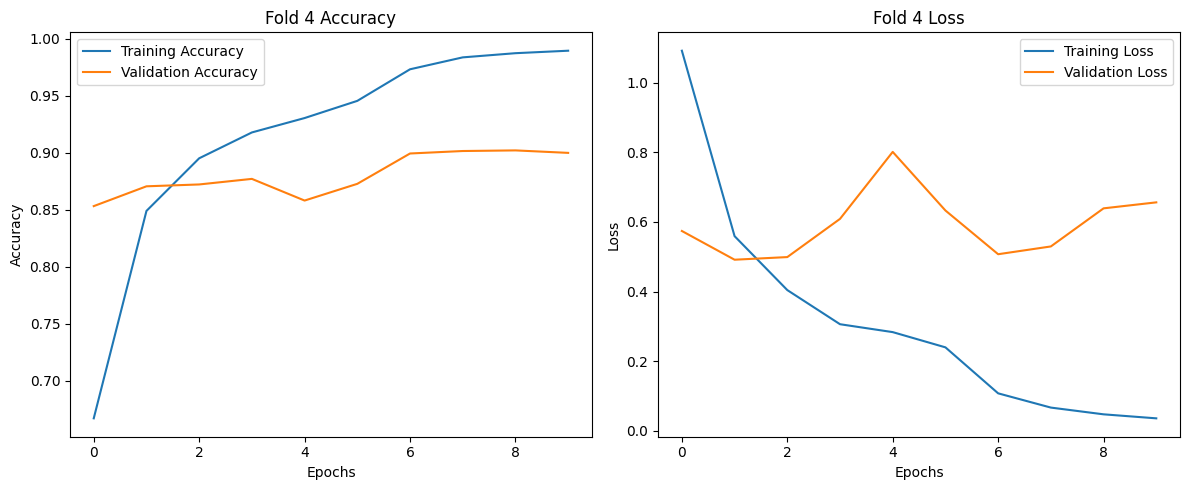

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step

Classification Report (Fold 4):
              precision    recall  f1-score   support

       metal     0.8513    0.9022    0.8760       184
       glass     0.9304    0.7989    0.8596       184
  biological     0.9514    0.9565    0.9539       184
       paper     0.8579    0.8859    0.8717       184
     battery     0.9396    0.9293    0.9344       184
       trash     0.8438    0.8804    0.8617       184
   cardboard     0.9111    0.8913    0.9011       184
       shoes     0.9516    0.9620    0.9568       184
     clothes     0.9780    0.9674    0.9727       184
     plastic     0.8211    0.8478    0.8342       184

    accuracy                         0.9022      1840
   macro avg     0.9036    0.9022    0.9022      1840
weighted avg     0.9036    0.9022    0.9022      1840



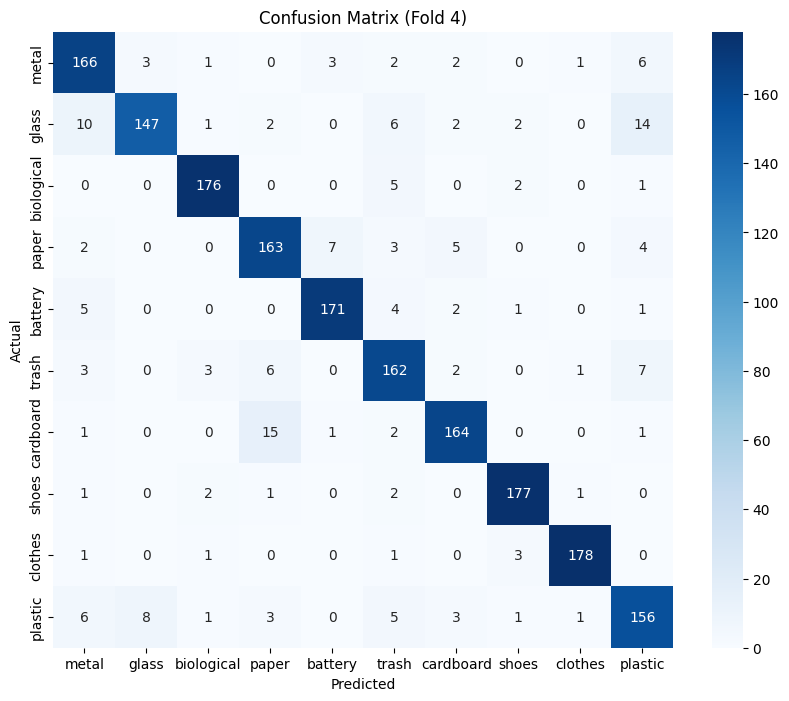


Training fold 5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5004 - loss: 1.4928
Epoch 1: val_accuracy improved from -inf to 0.86304, saving model to resnet50V2_best_weights_5.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.5011 - loss: 1.4911 - val_accuracy: 0.8630 - val_loss: 0.4818 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8528 - loss: 0.5442
Epoch 2: val_accuracy did not improve from 0.86304
460/460 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8528 - loss: 0.5443 - val_accuracy: 0.8310 - val_loss: 0.7202 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8796 - loss: 0.4501
Epoch 3: val_accuracy did not improve from 0.86304

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
460/460 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8796 - loss: 0.4500 - val_accuracy: 0.8543 - val_loss: 0.6436 - learning_rate: 0.0010
Epoch 4/10
459/460 ━━━━━━━━━━

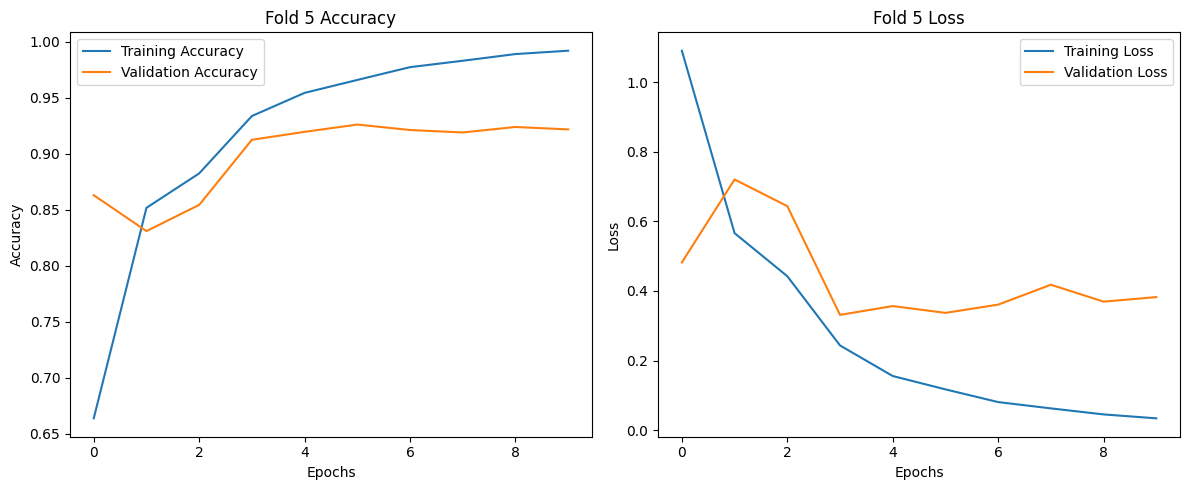

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step

Classification Report (Fold 5):
              precision    recall  f1-score   support

       metal     0.8485    0.9130    0.8796       184
       glass     0.9195    0.8696    0.8939       184
  biological     0.9730    0.9783    0.9756       184
       paper     0.9171    0.9022    0.9096       184
     battery     0.9133    0.9728    0.9421       184
       trash     0.8743    0.8696    0.8719       184
   cardboard     0.9661    0.9293    0.9474       184
       shoes     0.9725    0.9620    0.9672       184
     clothes     0.9728    0.9728    0.9728       184
     plastic     0.9111    0.8913    0.9011       184

    accuracy                         0.9261      1840
   macro avg     0.9268    0.9261    0.9261      1840
weighted avg     0.9268    0.9261    0.9261      1840



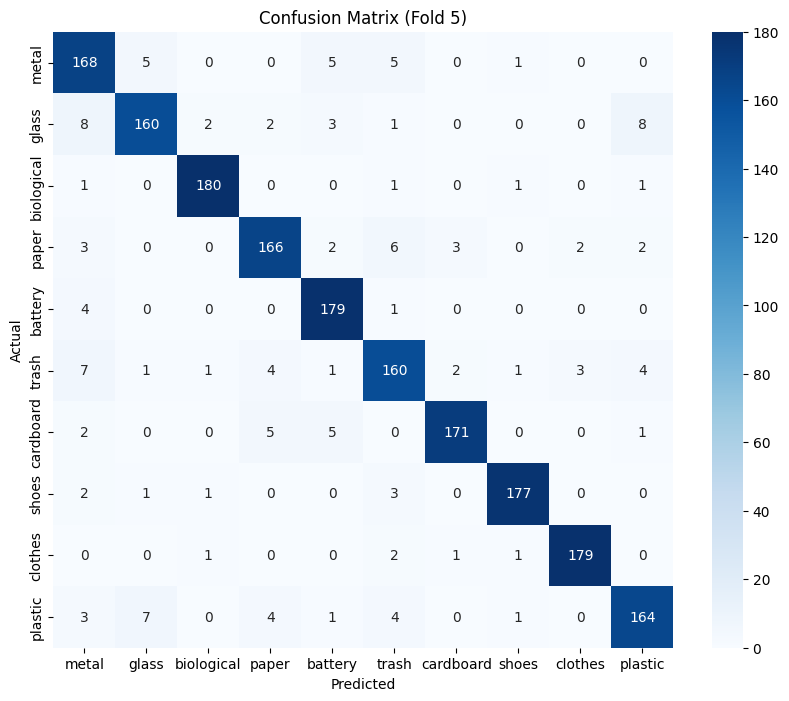

In [21]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
cumulative_cm = np.zeros((num_classes, num_classes), dtype=int)

for train_index, test_index in kf.split(X, y):
    print(f"\nTraining fold {fold_no}...")

    # Eğitim ve test veri setlerini ayırma
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Eğitim ve test veri setlerini yükleme ve ön işleme
    X_train_fold = load_and_preprocess_images(X_train_fold)
    X_test_fold = load_and_preprocess_images(X_test_fold)

    # Callbacks
    checkpoint = ModelCheckpoint(f'resnet50V2_best_weights_{fold_no}.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True, mode='max', verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
    callbacks = [checkpoint, early_stopping, reduce_lr]

    # Modelin oluşturulması (ResNet50V2 base modeli kullanılıyor)
    base_model = ResNet50V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers[:183]:  # İlk 150 katmanını donduruyoruz
        layer.trainable = False

    model = models.Sequential([
        layers.InputLayer(input_shape=(224, 224, 3)),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Modeli eğitme
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_test_fold, y_test_fold),
        epochs=10,
        batch_size=16,
        callbacks=callbacks,
        verbose=1
    )

    # Modeli kaydetme
    model_save_path = f"resnet50V2_model_fold_{fold_no}.keras"
    model.save(model_save_path)
    print(f"Model fold {fold_no} kaydedildi: {model_save_path}")

    # Eğitim grafikleri
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Fold {fold_no} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Tahminler ve Confusion Matrix
    y_pred = model.predict(X_test_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test_fold, y_pred_classes)
    cumulative_cm += cm

    print(f"\nClassification Report (Fold {fold_no}):")
    print(classification_report(y_test_fold, y_pred_classes, target_names=class_names, digits=4))

    # Confusion Matrix'i kaydet
    np.save(f'fold_{fold_no}_confusion_matrix.npy', cm)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix (Fold {fold_no})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fold_no += 1





Nihai Confusion Matrix (Toplam):


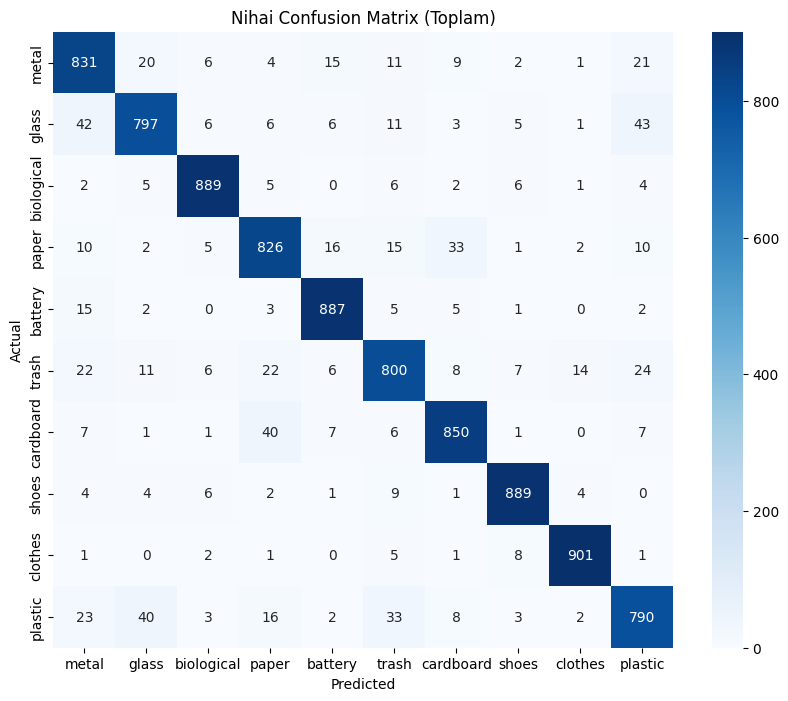

In [23]:
# Nihai Confusion Matrix
print("\nNihai Confusion Matrix (Toplam):")
# Nihai confusion matrix'i fold'ların toplamı olacak
plt.figure(figsize=(10, 8))
sns.heatmap(cumulative_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Nihai Confusion Matrix (Toplam)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# VGG19

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing import image

# Verisetinin dizini
dataset_dir = '/kaggle/input/garbage-dataset-equalizated-zip/garbage-dataset-equalizated'

# Veri sınıflarının bulunduğu klasörler
class_names = os.listdir(dataset_dir)
num_classes = len(class_names)

# Veriyi yükleme
X = []
y = []
class_counts = {}  # Her sınıfta kaç görsel olduğunu tutmak için

for idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_dir, class_name)
    images = [os.path.join(class_folder, img) for img in os.listdir(class_folder) if img.endswith('.jpg') or img.endswith('.png')]
    class_counts[class_name] = len(images)  # Sınıf başına görsel sayısı
    for image_path in images:
        X.append(image_path)
        y.append(idx)

X = np.array(X)
y = np.array(y)

# Sınıf bilgilerini ekrana yazdır
print(f"Toplam {num_classes} sınıf bulundu.")
print("Sınıf isimleri ve her sınıftaki görsel sayısı:")
for class_name, count in class_counts.items():
    print(f"- {class_name}: {count} görsel")


Toplam 10 sınıf bulundu.
Sınıf isimleri ve her sınıftaki görsel sayısı:
- metal: 920 görsel
- glass: 920 görsel
- biological: 920 görsel
- paper: 920 görsel
- battery: 920 görsel
- trash: 920 görsel
- cardboard: 920 görsel
- shoes: 920 görsel
- clothes: 920 görsel
- plastic: 920 görsel


In [2]:
def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img = image.img_to_array(img)
        img = img / 255.0  # Normalizasyon
        images.append(img)
    return np.array(images)


Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2693 - loss: 2.0643
Epoch 1: val_accuracy improved from -inf to 0.70707, saving model to vgg19_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 34s 64ms/step - accuracy: 0.2700 - loss: 2.0625 - val_accuracy: 0.7071 - val_loss: 0.9282 - learning_rate: 0.0010
Epoch 2/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6994 - loss: 0.9623
Epoch 2: val_accuracy improved from 0.70707 to 0.77826, saving model to vgg19_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.6995 - loss: 0.9622 - val_accuracy: 0.7783 - val_loss: 0.7087 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7908 - loss: 0.7094
Epoch 3: val_accuracy improved from 0.77826 to 0.81413, saving model to vgg19_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.7908 - loss: 0.7094 - val_accuracy: 0.8141 - val_loss: 0.6035 - learning_rate: 0.0010
Epoch 4/10
459/4

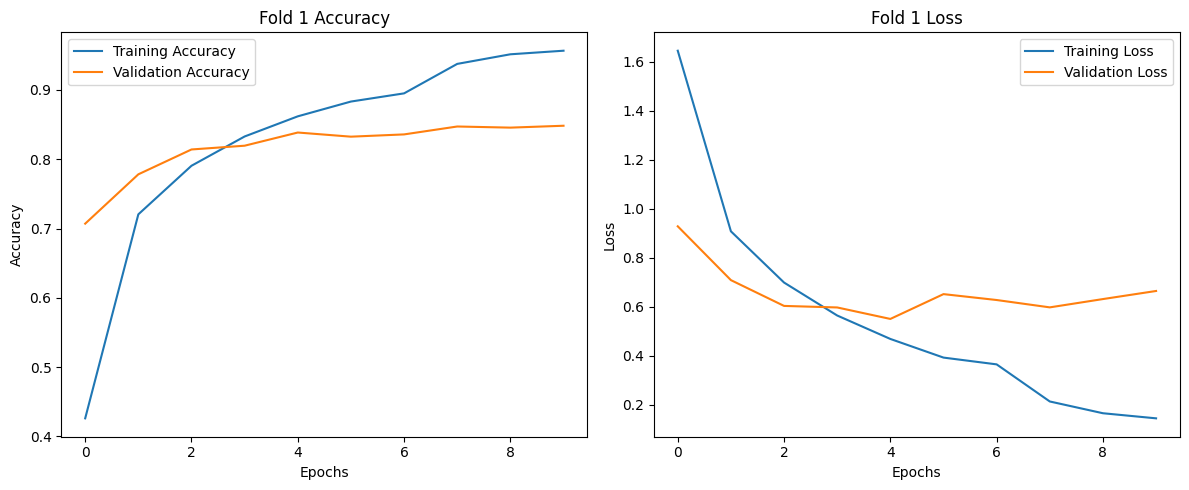

58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step

Classification Report (Fold 1):
              precision    recall  f1-score   support

       metal     0.8050    0.8750    0.8385       184
       glass     0.8598    0.7663    0.8103       184
  biological     0.8730    0.8967    0.8847       184
       paper     0.8294    0.7663    0.7966       184
     battery     0.9176    0.9076    0.9126       184
       trash     0.7738    0.7065    0.7386       184
   cardboard     0.8317    0.9130    0.8705       184
       shoes     0.9371    0.8913    0.9136       184
     clothes     0.8600    0.9348    0.8958       184
     plastic     0.8000    0.8261    0.8128       184

    accuracy                         0.8484      1840
   macro avg     0.8487    0.8484    0.8474      1840
weighted avg     0.8487    0.8484    0.8474      1840



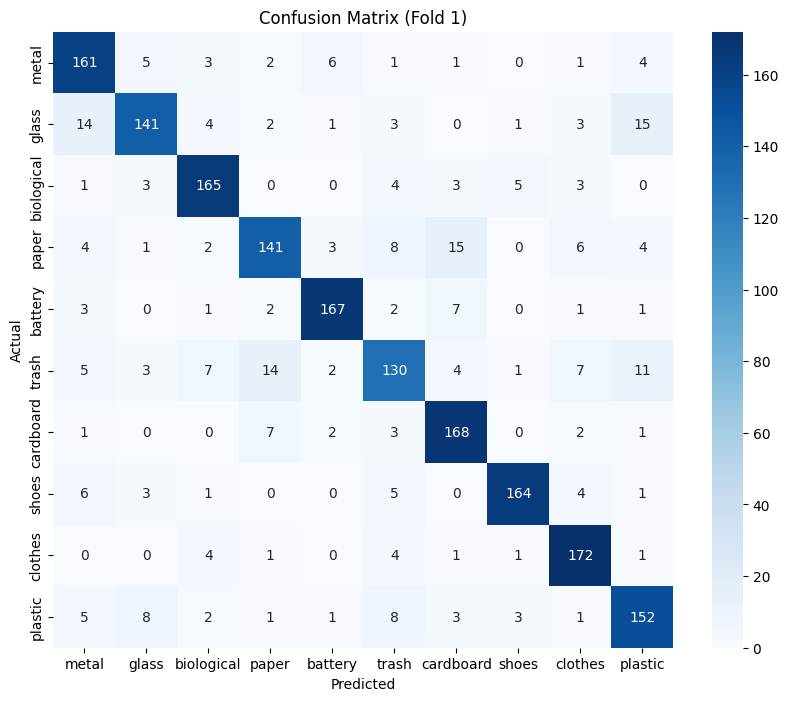


Training fold 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2594 - loss: 2.0951
Epoch 1: val_accuracy improved from -inf to 0.69946, saving model to vgg19_best_weights_2.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - accuracy: 0.2601 - loss: 2.0933 - val_accuracy: 0.6995 - val_loss: 0.9651 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6851 - loss: 0.9867
Epoch 2: val_accuracy improved from 0.69946 to 0.78152, saving model to vgg19_best_weights_2.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.6852 - loss: 0.9865 - val_accuracy: 0.7815 - val_loss: 0.7156 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7848 - loss: 0.7080
Epoch 3: val_accuracy improved from 0.78152 to 0.79946, saving model to vgg19_best_weights_2.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.7848 - loss: 0.7079 - val_accuracy: 0.7995 - val_loss: 0.6679 - learning_rate: 0.0010
Epoch 4/10
459/4

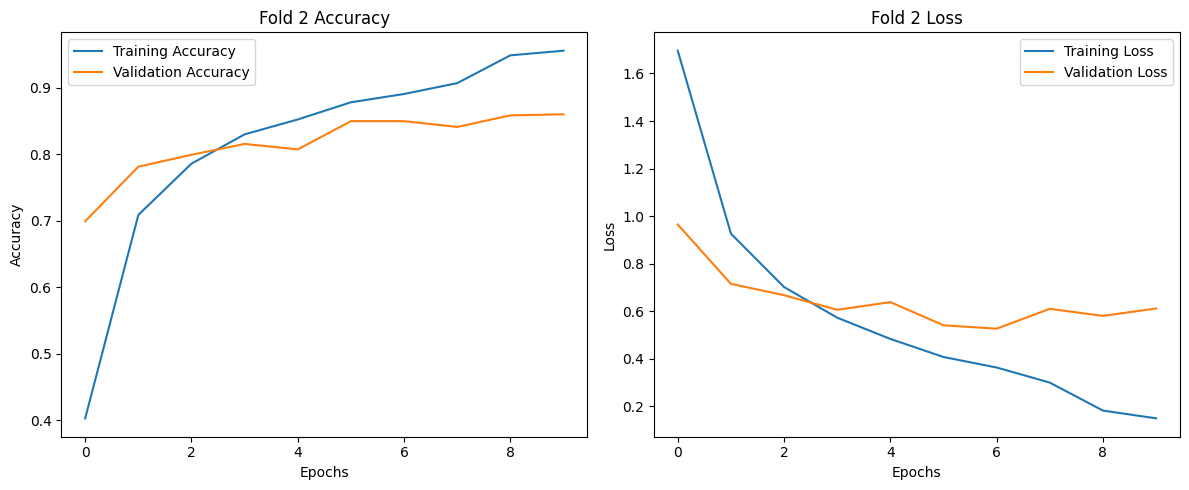

58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step

Classification Report (Fold 2):
              precision    recall  f1-score   support

       metal     0.8041    0.8478    0.8254       184
       glass     0.8075    0.8207    0.8140       184
  biological     0.9243    0.9293    0.9268       184
       paper     0.8118    0.8207    0.8162       184
     battery     0.9301    0.9402    0.9351       184
       trash     0.8182    0.8315    0.8248       184
   cardboard     0.8407    0.8315    0.8361       184
       shoes     0.9632    0.8533    0.9049       184
     clothes     0.8969    0.9457    0.9206       184
     plastic     0.8182    0.7826    0.8000       184

    accuracy                         0.8603      1840
   macro avg     0.8615    0.8603    0.8604      1840
weighted avg     0.8615    0.8603    0.8604      1840



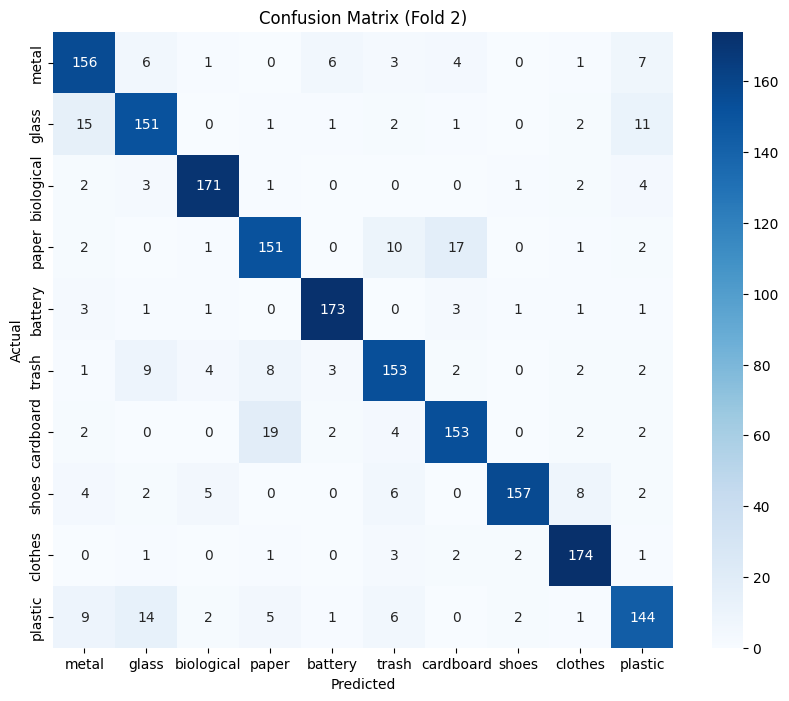


Training fold 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2727 - loss: 2.0529
Epoch 1: val_accuracy improved from -inf to 0.71957, saving model to vgg19_best_weights_3.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - accuracy: 0.2734 - loss: 2.0511 - val_accuracy: 0.7196 - val_loss: 0.9085 - learning_rate: 0.0010
Epoch 2/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6987 - loss: 0.9558
Epoch 2: val_accuracy improved from 0.71957 to 0.79185, saving model to vgg19_best_weights_3.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.6988 - loss: 0.9557 - val_accuracy: 0.7918 - val_loss: 0.6831 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7920 - loss: 0.6743
Epoch 3: val_accuracy improved from 0.79185 to 0.81848, saving model to vgg19_best_weights_3.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.7920 - loss: 0.6742 - val_accuracy: 0.8185 - val_loss: 0.6443 - learning_rate: 0.0010
Epoch 4/10
459/4

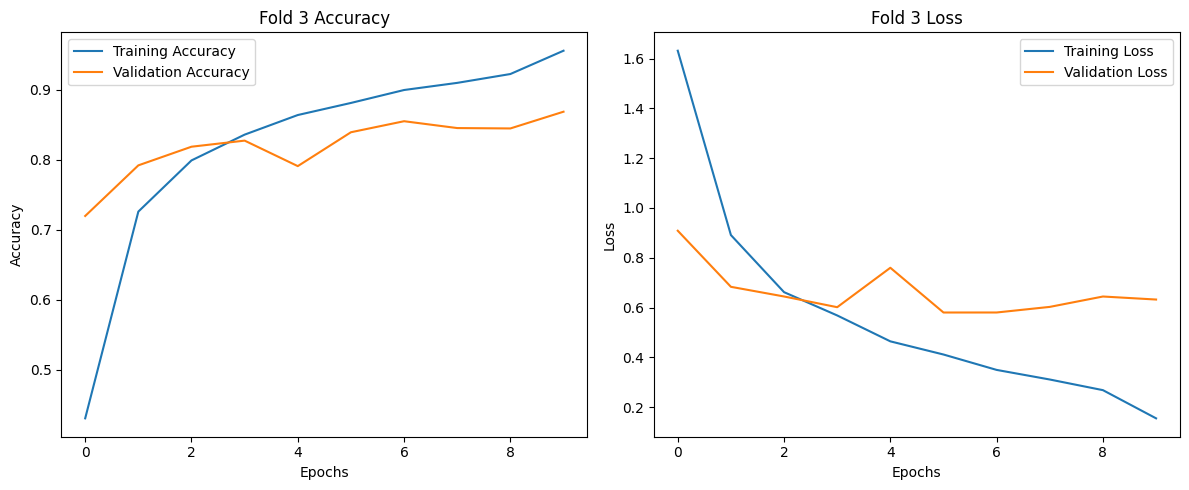

58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step

Classification Report (Fold 3):
              precision    recall  f1-score   support

       metal     0.8413    0.8641    0.8525       184
       glass     0.8436    0.8207    0.8320       184
  biological     0.9432    0.9022    0.9222       184
       paper     0.8021    0.8370    0.8191       184
     battery     0.8660    0.9130    0.8889       184
       trash     0.8040    0.8696    0.8355       184
   cardboard     0.8715    0.8478    0.8595       184
       shoes     0.9179    0.9728    0.9446       184
     clothes     0.9305    0.9457    0.9380       184
     plastic     0.8733    0.7120    0.7844       184

    accuracy                         0.8685      1840
   macro avg     0.8693    0.8685    0.8677      1840
weighted avg     0.8693    0.8685    0.8677      1840



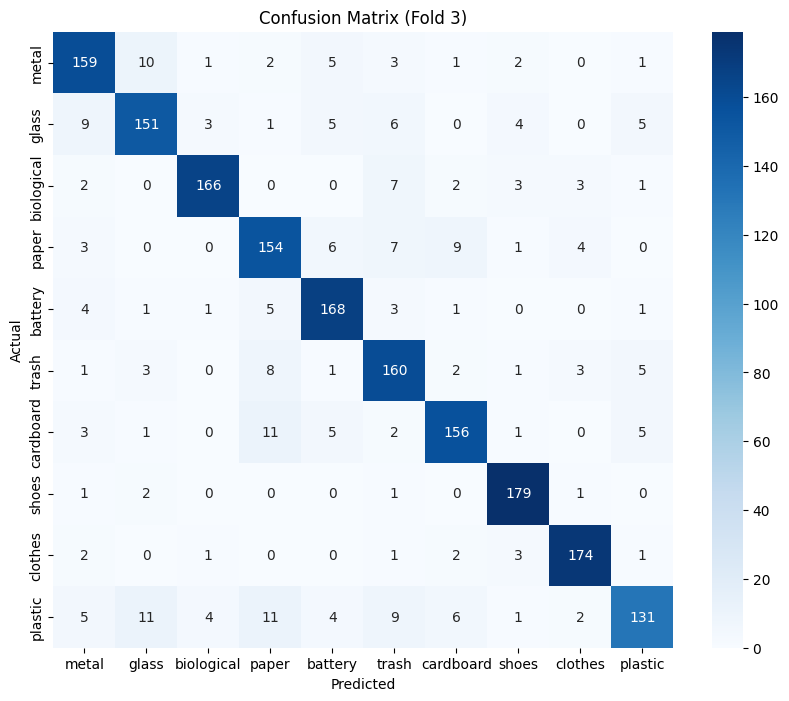


Training fold 4...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2654 - loss: 2.0716
Epoch 1: val_accuracy improved from -inf to 0.64457, saving model to vgg19_best_weights_4.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 33s 63ms/step - accuracy: 0.2661 - loss: 2.0697 - val_accuracy: 0.6446 - val_loss: 1.0655 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6841 - loss: 0.9625
Epoch 2: val_accuracy improved from 0.64457 to 0.76467, saving model to vgg19_best_weights_4.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.6842 - loss: 0.9622 - val_accuracy: 0.7647 - val_loss: 0.7640 - learning_rate: 0.0010
Epoch 3/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7947 - loss: 0.6876
Epoch 3: val_accuracy improved from 0.76467 to 0.79511, saving model to vgg19_best_weights_4.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.7947 - loss: 0.6876 - val_accuracy: 0.7951 - val_loss: 0.6890 - learning_rate: 0.0010
Epoch 4/10
460/4

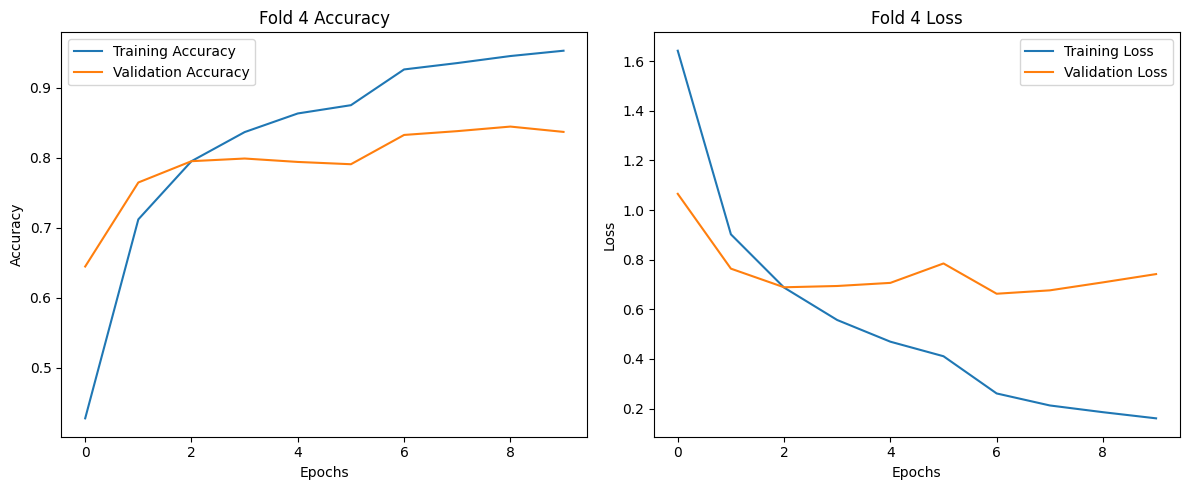

58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step

Classification Report (Fold 4):
              precision    recall  f1-score   support

       metal     0.8043    0.8043    0.8043       184
       glass     0.8987    0.7717    0.8304       184
  biological     0.8930    0.9076    0.9003       184
       paper     0.7732    0.8152    0.7937       184
     battery     0.8571    0.8804    0.8686       184
       trash     0.7730    0.7772    0.7751       184
   cardboard     0.8500    0.8315    0.8407       184
       shoes     0.9162    0.9511    0.9333       184
     clothes     0.9655    0.9130    0.9385       184
     plastic     0.7374    0.7935    0.7644       184

    accuracy                         0.8446      1840
   macro avg     0.8469    0.8446    0.8449      1840
weighted avg     0.8469    0.8446    0.8449      1840



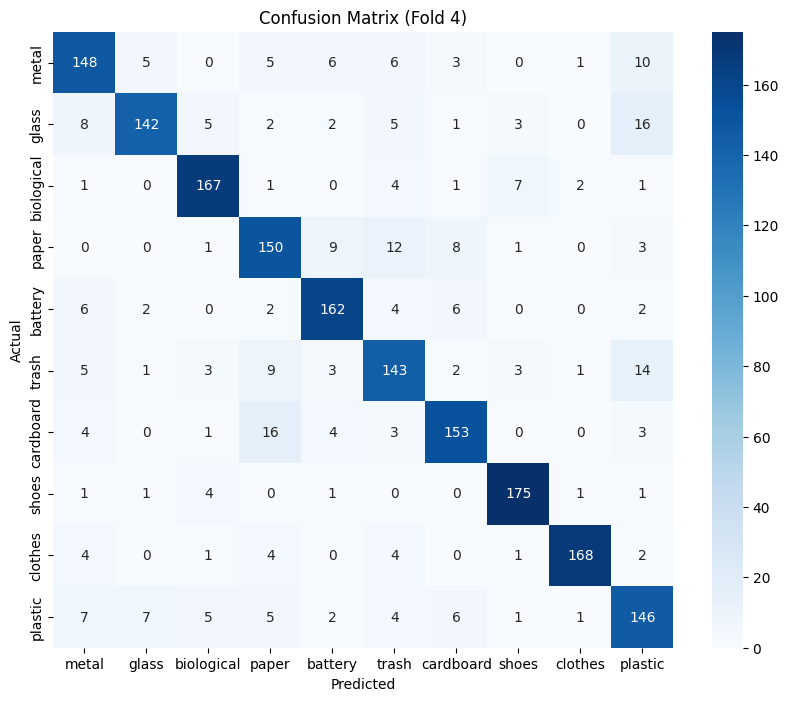


Training fold 5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2508 - loss: 2.0995
Epoch 1: val_accuracy improved from -inf to 0.67011, saving model to vgg19_best_weights_5.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - accuracy: 0.2511 - loss: 2.0986 - val_accuracy: 0.6701 - val_loss: 0.9775 - learning_rate: 0.0010
Epoch 2/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6872 - loss: 0.9744
Epoch 2: val_accuracy improved from 0.67011 to 0.78152, saving model to vgg19_best_weights_5.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.6873 - loss: 0.9742 - val_accuracy: 0.7815 - val_loss: 0.7113 - learning_rate: 0.0010
Epoch 3/10
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7832 - loss: 0.7129
Epoch 3: val_accuracy improved from 0.78152 to 0.80109, saving model to vgg19_best_weights_5.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.7832 - loss: 0.7129 - val_accuracy: 0.8011 - val_loss: 0.6634 - learning_rate: 0.0010
Epoch 4/10
459/4

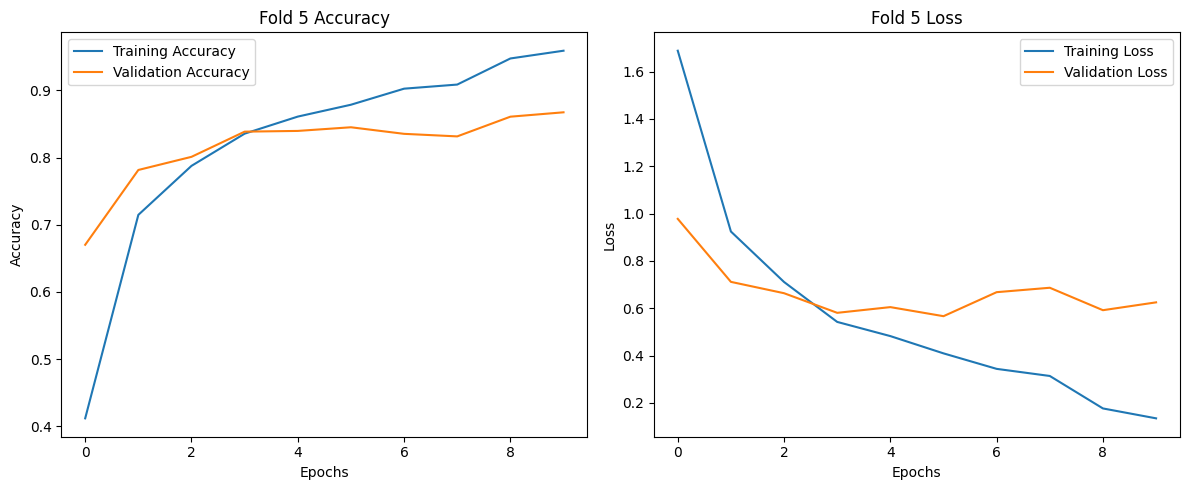

58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step

Classification Report (Fold 5):
              precision    recall  f1-score   support

       metal     0.8229    0.8587    0.8404       184
       glass     0.8726    0.7446    0.8035       184
  biological     0.9405    0.9457    0.9431       184
       paper     0.8457    0.8043    0.8245       184
     battery     0.8763    0.9239    0.8995       184
       trash     0.7635    0.8424    0.8010       184
   cardboard     0.8895    0.8750    0.8822       184
       shoes     0.9441    0.9185    0.9311       184
     clothes     0.9263    0.9565    0.9412       184
     plastic     0.8043    0.8043    0.8043       184

    accuracy                         0.8674      1840
   macro avg     0.8686    0.8674    0.8671      1840
weighted avg     0.8686    0.8674    0.8671      1840



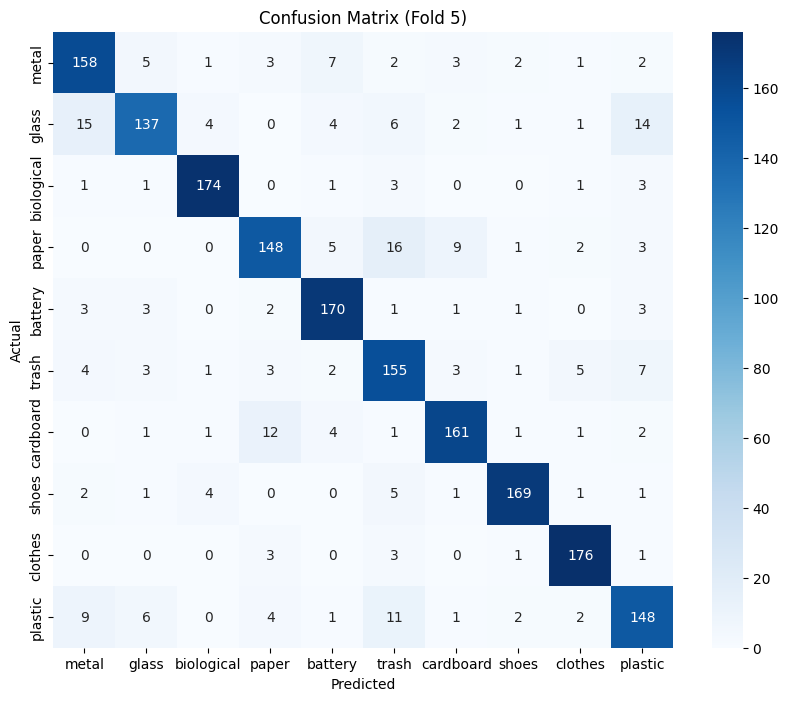

In [32]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
cumulative_cm = np.zeros((num_classes, num_classes), dtype=int)

for train_index, test_index in kf.split(X, y):
    print(f"\nTraining fold {fold_no}...")

    # Eğitim ve test veri setlerini ayırma
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Eğitim ve test veri setlerini yükleme ve ön işleme
    X_train_fold = load_and_preprocess_images(X_train_fold)
    X_test_fold = load_and_preprocess_images(X_test_fold)

    # Callbacks
    checkpoint = ModelCheckpoint(f'vgg19_best_weights_{fold_no}.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True, mode='max', verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
    callbacks = [checkpoint, early_stopping, reduce_lr]

    # Modelin oluşturulması (VGG19 base modeli kullanılıyor)
    base_model = VGG19(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers[:20]:  # İlk 15 katmanını donduruyoruz
        layer.trainable = False

    model = models.Sequential([
        layers.InputLayer(input_shape=(224, 224, 3)),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Modeli eğitme
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_test_fold, y_test_fold),
        epochs=10,
        batch_size=16,
        callbacks=callbacks,
        verbose=1
    )

    # Modeli kaydetme
    model_save_path = f"vgg19_model_fold_{fold_no}.keras"
    model.save(model_save_path)
    print(f"Model fold {fold_no} kaydedildi: {model_save_path}")

    # Eğitim grafikleri
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Fold {fold_no} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Tahminler ve Confusion Matrix
    y_pred = model.predict(X_test_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test_fold, y_pred_classes)
    cumulative_cm += cm

    print(f"\nClassification Report (Fold {fold_no}):")
    print(classification_report(y_test_fold, y_pred_classes, target_names=class_names, digits=4))

    # Confusion Matrix'i kaydet
    np.save(f'fold_{fold_no}_confusion_matrix.npy', cm)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix (Fold {fold_no})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fold_no += 1





Nihai Confusion Matrix (Toplam):


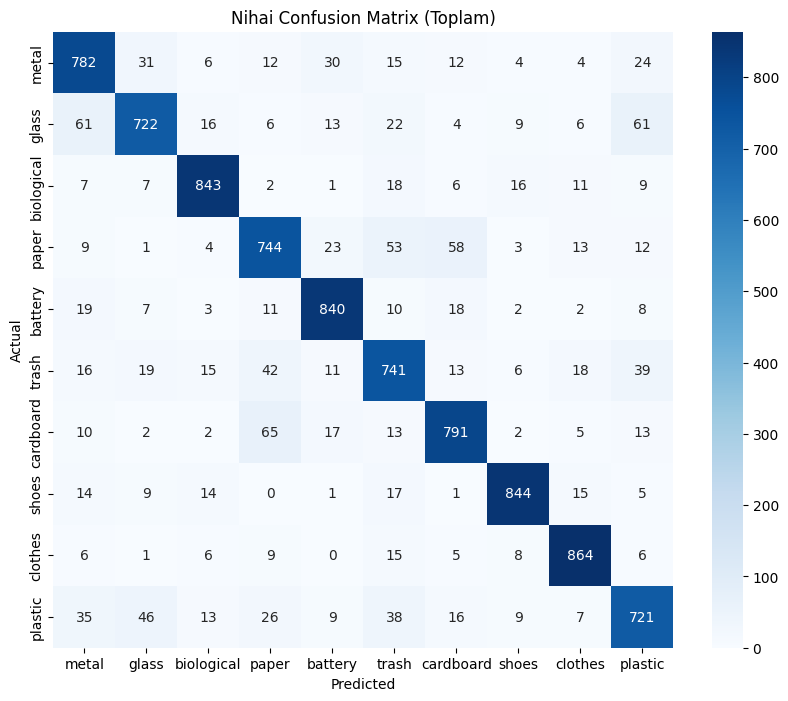

In [33]:
# Nihai Confusion Matrix
print("\nNihai Confusion Matrix (Toplam):")
# Nihai confusion matrix'i fold'ların toplamı olacak
plt.figure(figsize=(10, 8))
sns.heatmap(cumulative_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Nihai Confusion Matrix (Toplam)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# EFFICIENTNETV2B0

In [17]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
cumulative_cm = np.zeros((num_classes, num_classes), dtype=int)

for train_index, test_index in kf.split(X, y):
    print(f"\nTraining fold {fold_no}...")

    # Eğitim ve test veri setlerini ayırma
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Eğitim ve test veri setlerini yükleme ve ön işleme
    X_train_fold = load_and_preprocess_images(X_train_fold)
    X_test_fold = load_and_preprocess_images(X_test_fold)

    # Callbacks
    checkpoint = ModelCheckpoint(f'efficientnetV2_best_weights_{fold_no}.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True, mode='max', verbose=0)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
    callbacks = [checkpoint, early_stopping, reduce_lr]

    # Modelin oluşturulması (EfficientNetV2 base modeli kullanılıyor)
    base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers[:235]: 
        layer.trainable = False
    
    model = models.Sequential([
        layers.InputLayer(input_shape=(224, 224, 3)),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Modeli eğitme
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_test_fold, y_test_fold),
        epochs=10,
        batch_size=16,
        callbacks=callbacks,
        verbose=1
    )

    # Modeli kaydetme
    model_save_path = f"efficientnetV2_model_fold_{fold_no}.keras"
    model.save(model_save_path)
    print(f"Model fold {fold_no} kaydedildi: {model_save_path}")

    # Eğitim grafikleri
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Fold {fold_no} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Tahminler ve Confusion Matrix
    y_pred = model.predict(X_test_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test_fold, y_pred_classes)
    cumulative_cm += cm

    print(f"\nClassification Report (Fold {fold_no}):")
    print(classification_report(y_test_fold, y_pred_classes, target_names=class_names, digits=4))

    # Confusion Matrix'i kaydet
    np.save(f'fold_{fold_no}_confusion_matrix.npy', cm)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix (Fold {fold_no})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fold_no += 1

# Nihai Confusion Matrix
print("\nNihai Confusion Matrix (Toplam):")
# Nihai confusion matrix'i fold'ların toplamı olacak
plt.figure(figsize=(10, 8))
sns.heatmap(cumulative_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Nihai Confusion Matrix (Toplam)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0999 - loss: 2.3602
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to efficientnetV2_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.0999 - loss: 2.3601 - val_accuracy: 0.1000 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 2/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0941 - loss: 2.3064
Epoch 2: val_accuracy improved from 0.10000 to 0.10054, saving model to efficientnetV2_best_weights_1.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.0941 - loss: 2.3064 - val_accuracy: 0.1005 - val_loss: 2.3027 - learning_rate: 0.0010
Epoch 3/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0960 - loss: 2.3036
Epoch 3: val_accuracy did not improve from 0.10054
460/460 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.0960 - loss: 2.3036 - val_accuracy: 0.1000 - val_loss: 2.3026 - learning_rate: 0.0010
Epoch 4/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 19m

KeyboardInterrupt: 

In [16]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold


# Modelin oluşturulması (EfficientNetV2 base modeli kullanılıyor)
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers[:235]: 
    layer.trainable = False

base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_19 (Rescaling)  │ (None, 224, 224, 3)    │              0 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_13          │ (None, 224, 224, 3)    │              7 │ rescaling_19[0][0]     │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_20 (Rescaling)  │ (None, 224, 224, 3)    │              0 │ normalization_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_20[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 412,160 (1.57 MB)

 Non-trainable params: 3,637,411 (13.88 MB)